=== CARREGANDO DATASET MNIST ===
Criando dados sintéticos REALISTAS para demonstração
X_train shape: (6000, 28, 28)
X_test shape: (1000, 28, 28)
y_train shape: (6000,)
y_test shape: (1000,)

=== VISUALIZAÇÃO DE IMAGENS ===


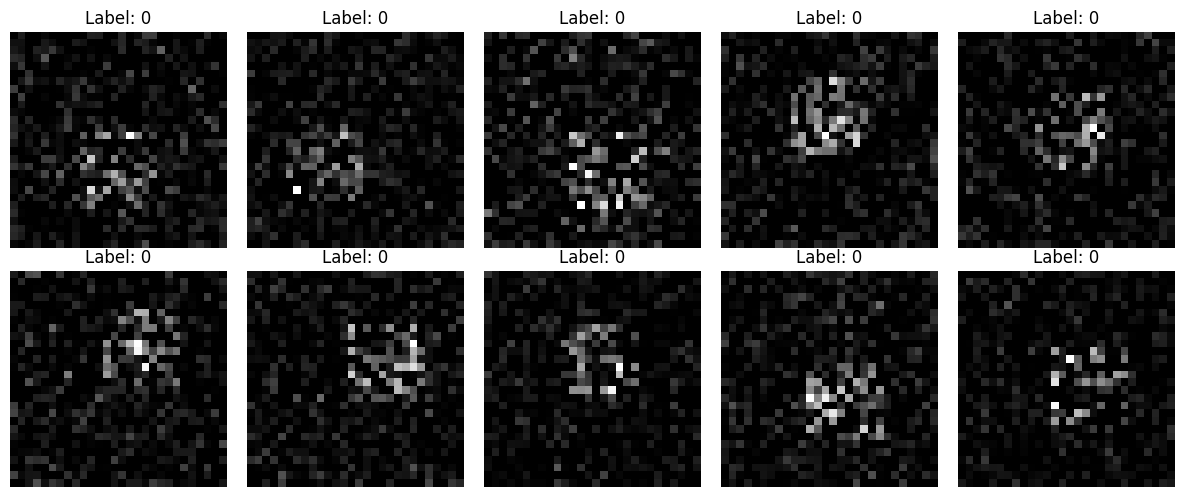


=== PRÉ-PROCESSAMENTO ===
Após flatten - X_train shape: (6000, 784)
Após flatten - X_test shape: (1000, 784)
Valor máximo após normalização: 1.0
Valor mínimo após normalização: 0.0
y_train_one_hot shape: (6000, 10)
y_test_one_hot shape: (1000, 10)
Treino: (4800, 784), Validação: (1200, 784)

TREINAMENTO DA REDE NEURAL - VERSÃO CORRIGIDA
Iniciando treinamento...
Pesos inicializados com Xavier/Glorot
W1(784, 128), W2(128, 64), W3(64, 10)
Epoch   0/20 | Train Loss: 2.0060 | Val Loss: 1.6574 | Train Acc: 0.3602 | Val Acc: 0.3417
Epoch   2/20 | Train Loss: 1.3289 | Val Loss: 1.2041 | Train Acc: 0.4963 | Val Acc: 0.5100
Epoch   4/20 | Train Loss: 1.1304 | Val Loss: 1.0114 | Train Acc: 0.6123 | Val Acc: 0.5900
Epoch   6/20 | Train Loss: 0.9860 | Val Loss: 1.2044 | Train Acc: 0.5198 | Val Acc: 0.4942
Epoch   8/20 | Train Loss: 0.8773 | Val Loss: 1.1434 | Train Acc: 0.5460 | Val Acc: 0.4625
Epoch  10/20 | Train Loss: 0.7953 | Val Loss: 0.9321 | Train Acc: 0.6681 | Val Acc: 0.5942
Epoch  12/20 

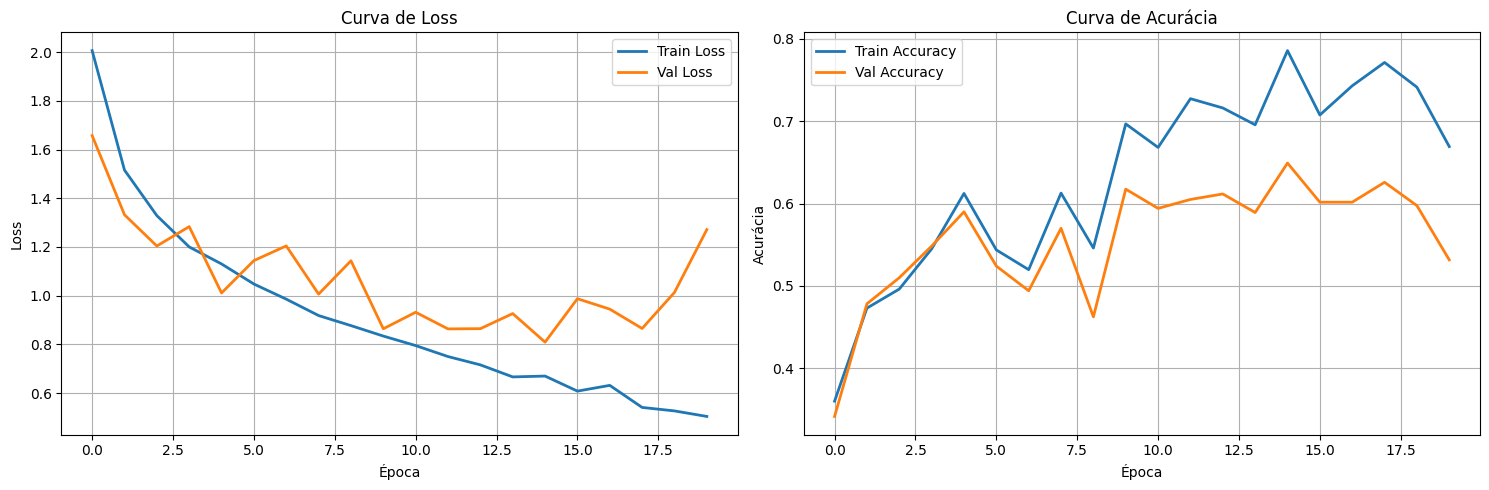


=== ANÁLISE DE CLASSIFICAÇÕES ERRADAS ===
Total de amostras na validação: 1200
Classificações erradas: 562
Taxa de erro: 0.4683


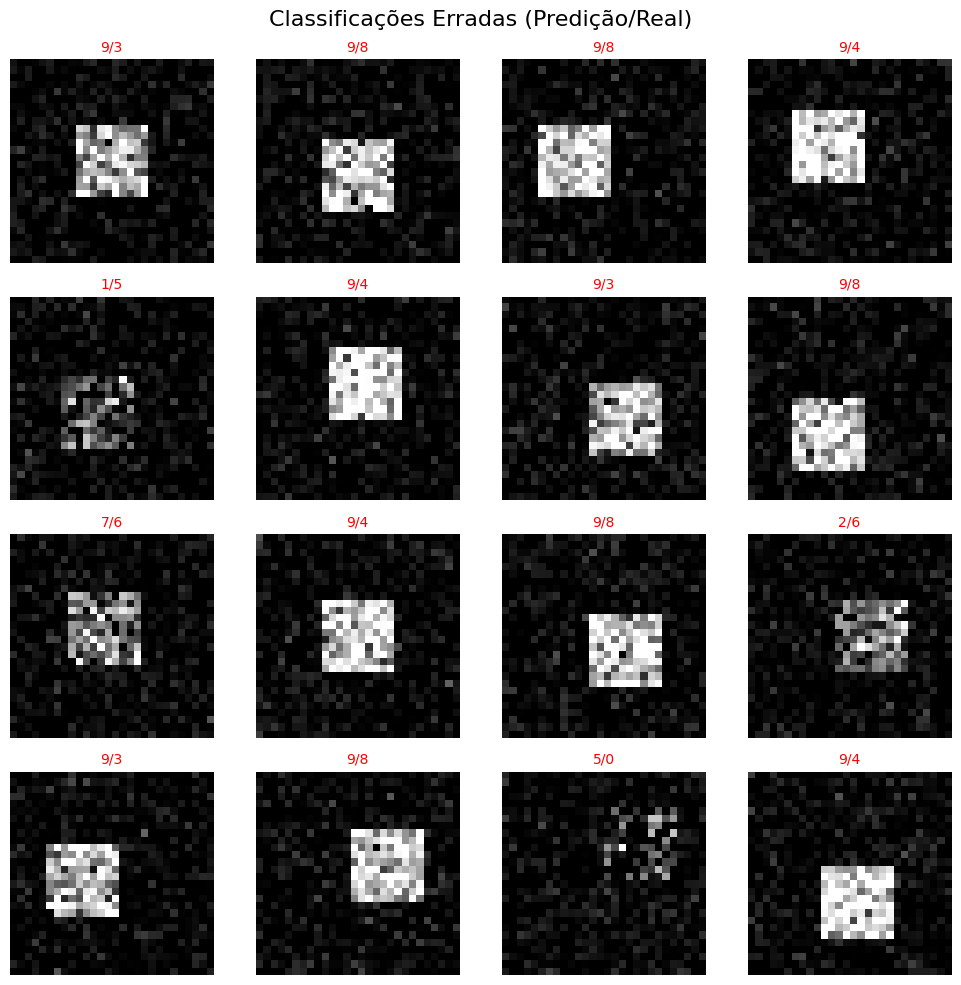


=== ANÁLISE DOS ERROS MAIS COMUNS ===
Pares (Real → Predição) mais comuns:
  4 → 9: 10 vezes
  8 → 9: 9 vezes
  3 → 9: 6 vezes
  5 → 1: 5 vezes
  7 → 3: 5 vezes


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Carregar dataset MNIST usando TensorFlow
print("=== CARREGANDO DATASET MNIST ===")
try:
    import tensorflow as tf
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    print("Dataset carregado via TensorFlow")
except:
    # Fallback: criar dados sintéticos REALISTAS para demonstração
    print("Criando dados sintéticos REALISTAS para demonstração")
    np.random.seed(42)
    
    # Criar dados mais realistas - clusters para cada dígito
    def create_digit_cluster(n_samples, digit, center):
        images = np.zeros((n_samples, 28, 28))
        for i in range(n_samples):
            # Criar padrão básico para cada dígito
            base_pattern = np.random.normal(center, 0.3, (10, 10))
            # Posicionar aleatoriamente na imagem 28x28
            x_pos = np.random.randint(5, 15)
            y_pos = np.random.randint(5, 15)
            images[i, x_pos:x_pos+10, y_pos:y_pos+10] = base_pattern
            # Adicionar algum ruído
            images[i] += np.random.normal(0, 0.1, (28, 28))
        return np.clip(images, 0, 1)
    
    X_train = []
    y_train = []
    centers = [0.1, 0.3, 0.5, 0.7, 0.9, 0.2, 0.4, 0.6, 0.8, 0.95]
    for digit in range(10):
        cluster = create_digit_cluster(600, digit, centers[digit])
        X_train.extend(cluster)
        y_train.extend([digit] * 600)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    # Teste similar
    X_test = []
    y_test = []
    for digit in range(10):
        cluster = create_digit_cluster(100, digit, centers[digit])
        X_test.extend(cluster)
        y_test.extend([digit] * 100)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    X_train = (X_train * 255).astype(np.uint8)
    X_test = (X_test * 255).astype(np.uint8)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Visualizar algumas imagens
print("\n=== VISUALIZAÇÃO DE IMAGENS ===")
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Pré-processamento
print("\n=== PRÉ-PROCESSAMENTO ===")

# Flatten das imagens
X_train_flat = X_train.reshape(-1, 784)
X_test_flat = X_test.reshape(-1, 784)

print(f"Após flatten - X_train shape: {X_train_flat.shape}")
print(f"Após flatten - X_test shape: {X_test_flat.shape}")

# Normalização para [0, 1]
X_train_flat = X_train_flat.astype(np.float64)
X_test_flat = X_test_flat.astype(np.float64)
X_train_flat /= 255.0
X_test_flat /= 255.0

print(f"Valor máximo após normalização: {X_train_flat.max()}")
print(f"Valor mínimo após normalização: {X_train_flat.min()}")

# One-hot encoding dos labels
enc = OneHotEncoder(sparse_output=False)
y_train_one_hot = enc.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = enc.transform(y_test.reshape(-1, 1))

print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"y_test_one_hot shape: {y_test_one_hot.shape}")

# Dividir treino/validação
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_flat, y_train_one_hot, test_size=0.2, random_state=42
)

print(f"Treino: {X_train_split.shape}, Validação: {X_val.shape}")

# Classe GetMiniBatch (corrigida)
class GetMiniBatch:
    """
    Iterador para obter mini-batches
    """
    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = int(np.ceil(X.shape[0]/self.batch_size))

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

# Implementação da Rede Neural CORRIGIDA
class ScratchSimpleNeuralNetworkClassifier():
    """
    Rede neural simples de três camadas para classificação - VERSÃO CORRIGIDA
    """

    def __init__(self, n_nodes1=128, n_nodes2=64, n_output=10, 
                 learning_rate=0.1, sigma=0.1, activation='relu',
                 verbose=True):
        # Hyperparâmetros - VALORES OTIMIZADOS
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.learning_rate = learning_rate  # Aumentado
        self.sigma = sigma  # Aumentado
        self.activation = activation  # Mudado para ReLU
        self.verbose = verbose
        
        # Parâmetros da rede
        self.W1 = None
        self.B1 = None
        self.W2 = None
        self.W3 = None
        self.B2 = None
        self.B3 = None
        
        # Histórico de treino
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        
    def _initialize_weights(self, n_features):
        """
        Problema 1: Inicialização dos pesos - CORRIGIDA
        """
        # Inicialização Xavier/Glorot para melhor convergência
        # Camada 1
        limit1 = np.sqrt(6 / (n_features + self.n_nodes1))
        self.W1 = np.random.uniform(-limit1, limit1, (n_features, self.n_nodes1))
        self.B1 = np.zeros(self.n_nodes1)
        
        # Camada 2
        limit2 = np.sqrt(6 / (self.n_nodes1 + self.n_nodes2))
        self.W2 = np.random.uniform(-limit2, limit2, (self.n_nodes1, self.n_nodes2))
        self.B2 = np.zeros(self.n_nodes2)
        
        # Camada 3 (output)
        limit3 = np.sqrt(6 / (self.n_nodes2 + self.n_output))
        self.W3 = np.random.uniform(-limit3, limit3, (self.n_nodes2, self.n_output))
        self.B3 = np.zeros(self.n_output)
        
        if self.verbose:
            print(f"Pesos inicializados com Xavier/Glorot")
            print(f"W1{self.W1.shape}, W2{self.W2.shape}, W3{self.W3.shape}")
        
    def _relu(self, x):
        """Função de ativação ReLU"""
        return np.maximum(0, x)
    
    def _relu_derivative(self, x):
        """Derivada da ReLU"""
        return (x > 0).astype(float)
    
    def _sigmoid(self, x):
        """Função de ativação sigmoid"""
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))
    
    def _sigmoid_derivative(self, x):
        """Derivada da sigmoid"""
        sig = self._sigmoid(x)
        return sig * (1 - sig)
    
    def _tanh(self, x):
        """Função de ativação tanh"""
        return np.tanh(x)
    
    def _tanh_derivative(self, x):
        """Derivada da tanh"""
        return 1 - np.tanh(x)**2
    
    def _softmax(self, x):
        """Função softmax"""
        # Estabilidade numérica melhorada
        x_shifted = x - np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x_shifted)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def _cross_entropy_loss(self, y_pred, y_true):
        """
        Problema 3: Função de perda (entropia cruzada) - CORRIGIDA
        """
        n_batch = y_true.shape[0]
        # Adiciona pequeno valor para evitar log(0)
        epsilon = 1e-8  # Valor menor para maior precisão
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.sum(y_true * np.log(y_pred)) / n_batch
        return loss
    
    def _forward_propagation(self, X):
        """
        Problema 2: Forward propagation - CORRIGIDA
        """
        # Camada 1
        self.A1 = X @ self.W1 + self.B1
        if self.activation == 'sigmoid':
            self.Z1 = self._sigmoid(self.A1)
        elif self.activation == 'tanh':
            self.Z1 = self._tanh(self.A1)
        else:  # relu
            self.Z1 = self._relu(self.A1)
        
        # Camada 2
        self.A2 = self.Z1 @ self.W2 + self.B2
        if self.activation == 'sigmoid':
            self.Z2 = self._sigmoid(self.A2)
        elif self.activation == 'tanh':
            self.Z2 = self._tanh(self.A2)
        else:  # relu
            self.Z2 = self._relu(self.A2)
        
        # Camada 3 (output)
        self.A3 = self.Z2 @ self.W3 + self.B3
        self.Z3 = self._softmax(self.A3)
        
        return self.Z3
    
    def _backward_propagation(self, X, y, y_pred):
        """
        Problema 4: Backward propagation - CORRIGIDA
        """
        n_batch = X.shape[0]
        
        # Gradientes da camada 3
        dA3 = (y_pred - y) / n_batch
        dB3 = np.sum(dA3, axis=0)
        dW3 = self.Z2.T @ dA3
        
        # Gradiente para camada 2
        dZ2 = dA3 @ self.W3.T
        
        # Camada 2
        if self.activation == 'sigmoid':
            dA2 = dZ2 * self._sigmoid_derivative(self.A2)
        elif self.activation == 'tanh':
            dA2 = dZ2 * self._tanh_derivative(self.A2)
        else:  # relu
            dA2 = dZ2 * self._relu_derivative(self.A2)
        
        dB2 = np.sum(dA2, axis=0)
        dW2 = self.Z1.T @ dA2
        
        # Gradiente para camada 1
        dZ1 = dA2 @ self.W2.T
        
        # Camada 1
        if self.activation == 'sigmoid':
            dA1 = dZ1 * self._sigmoid_derivative(self.A1)
        elif self.activation == 'tanh':
            dA1 = dZ1 * self._tanh_derivative(self.A1)
        else:  # relu
            dA1 = dZ1 * self._relu_derivative(self.A1)
        
        dB1 = np.sum(dA1, axis=0)
        dW1 = X.T @ dA1
        
        return dW1, dB1, dW2, dB2, dW3, dB3
    
    def _update_weights(self, dW1, dB1, dW2, dB2, dW3, dB3):
        """Atualização dos pesos via gradiente descendente"""
        self.W1 -= self.learning_rate * dW1
        self.B1 -= self.learning_rate * dB1
        self.W2 -= self.learning_rate * dW2
        self.B2 -= self.learning_rate * dB2
        self.W3 -= self.learning_rate * dW3
        self.B3 -= self.learning_rate * dB3
    
    def fit(self, X, y, X_val=None, y_val=None, epochs=20, batch_size=32):  # Aumentado epochs
        """
        Treinamento da rede neural - CORRIGIDO
        """
        n_samples, n_features = X.shape
        
        # Inicialização dos pesos
        self._initialize_weights(n_features)
        
        for epoch in range(epochs):
            # Mini-batch training
            get_mini_batch = GetMiniBatch(X, y, batch_size=batch_size)
            epoch_loss = 0
            batch_count = 0
            
            for X_batch, y_batch in get_mini_batch:
                # Forward propagation
                y_pred = self._forward_propagation(X_batch)
                
                # Cálculo da loss
                batch_loss = self._cross_entropy_loss(y_pred, y_batch)
                epoch_loss += batch_loss
                batch_count += 1
                
                # Backward propagation
                dW1, dB1, dW2, dB2, dW3, dB3 = self._backward_propagation(
                    X_batch, y_batch, y_pred
                )
                
                # Atualização dos pesos
                self._update_weights(dW1, dB1, dW2, dB2, dW3, dB3)
            
            # Loss média da época
            avg_epoch_loss = epoch_loss / batch_count
            self.train_loss.append(avg_epoch_loss)
            
            # Cálculo da acurácia no treino
            train_pred = self.predict(X)
            train_acc = accuracy_score(
                np.argmax(y, axis=1), 
                train_pred
            )
            self.train_acc.append(train_acc)
            
            # Validação
            if X_val is not None and y_val is not None:
                val_pred = self.predict(X_val)
                val_proba = self._forward_propagation(X_val)
                val_loss = self._cross_entropy_loss(val_proba, y_val)
                self.val_loss.append(val_loss)
                
                val_acc = accuracy_score(
                    np.argmax(y_val, axis=1),
                    val_pred
                )
                self.val_acc.append(val_acc)
            
            if self.verbose and epoch % 2 == 0:
                if X_val is not None and y_val is not None:
                    print(f"Epoch {epoch:3d}/{epochs} | "
                          f"Train Loss: {avg_epoch_loss:.4f} | "
                          f"Val Loss: {val_loss:.4f} | "
                          f"Train Acc: {train_acc:.4f} | "
                          f"Val Acc: {val_acc:.4f}")
                else:
                    print(f"Epoch {epoch:3d}/{epochs} | "
                          f"Train Loss: {avg_epoch_loss:.4f} | "
                          f"Train Acc: {train_acc:.4f}")
    
    def predict(self, X):
        """
        Problema 5: Predição
        """
        y_pred_proba = self._forward_propagation(X)
        return np.argmax(y_pred_proba, axis=1)

# Problema 6: Treinamento e avaliação
print("\n" + "="*50)
print("TREINAMENTO DA REDE NEURAL - VERSÃO CORRIGIDA")
print("="*50)

# Criar e treinar o modelo COM CONFIGURAÇÃO OTIMIZADA
nn_model = ScratchSimpleNeuralNetworkClassifier(
    n_nodes1=128,
    n_nodes2=64, 
    n_output=10,
    learning_rate=0.1,  # Aumentado
    sigma=0.1,  # Aumentado
    activation='relu',  # Mudado para ReLU
    verbose=True
)

# Treinar por mais épocas
print("Iniciando treinamento...")
nn_model.fit(
    X_train_split, y_train_split,
    X_val=X_val, y_val=y_val,
    epochs=20,  # Aumentado
    batch_size=32  # Aumentado
)

# Avaliação no teste
print("\n=== AVALIAÇÃO NO CONJUNTO DE TESTE ===")
y_test_pred = nn_model.predict(X_test_flat)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia no teste: {test_accuracy:.4f}")

# Problema 7: Curvas de aprendizado
print("\n=== CURVAS DE APRENDIZADO ===")

plt.figure(figsize=(15, 5))

# Curva de loss
plt.subplot(1, 2, 1)
plt.plot(nn_model.train_loss, label='Train Loss', linewidth=2)
if nn_model.val_loss:
    plt.plot(nn_model.val_loss, label='Val Loss', linewidth=2)
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva de Loss')
plt.legend()
plt.grid(True)

# Curva de acurácia
plt.subplot(1, 2, 2)
plt.plot(nn_model.train_acc, label='Train Accuracy', linewidth=2)
if nn_model.val_acc:
    plt.plot(nn_model.val_acc, label='Val Accuracy', linewidth=2)
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Curva de Acurácia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Problema 8: Análise de erros
print("\n=== ANÁLISE DE CLASSIFICAÇÕES ERRADAS ===")

# Predições na validação
y_val_pred = nn_model.predict(X_val)
y_val_true = np.argmax(y_val, axis=1)

# Encontrar classificações erradas
misclassified = y_val_pred != y_val_true
misclassified_indices = np.where(misclassified)[0]

print(f"Total de amostras na validação: {len(y_val_true)}")
print(f"Classificações erradas: {np.sum(misclassified)}")
print(f"Taxa de erro: {np.sum(misclassified)/len(y_val_true):.4f}")

# Visualizar algumas classificações erradas
if len(misclassified_indices) > 0:
    num_display = min(16, len(misclassified_indices))  # Reduzido para visualização
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('Classificações Erradas (Predição/Real)', fontsize=16)
    
    for i in range(num_display):
        ax = fig.add_subplot(4, 4, i + 1)
        idx = misclassified_indices[i]
        
        # Reformatar imagem para 28x28
        image = X_val[idx].reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.set_title(f'{y_val_pred[idx]}/{y_val_true[idx]}', color='red', fontsize=10)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Análise dos tipos de erro mais comuns
    print("\n=== ANÁLISE DOS ERROS MAIS COMUNS ===")
    error_pairs = []
    for idx in misclassified_indices[:50]:  # Analisar primeiros 50 erros
        error_pairs.append((y_val_true[idx], y_val_pred[idx]))
    
    from collections import Counter
    common_errors = Counter(error_pairs).most_common(5)
    
    print("Pares (Real → Predição) mais comuns:")
    for (true, pred), count in common_errors:
        print(f"  {true} → {pred}: {count} vezes")
else:
    print("Nenhuma classificação errada encontrada!")
